In [1]:
using Distributed
addprocs(44);

### Fitting a choice model.

First you have to include the necessary package

In [2]:
using pulse_input_DDM, Flatten

┌ Info: Recompiling stale cache file /usr/people/briandd/.julia/compiled/v1.2/pulse_input_DDM/m8WoA.ji for pulse_input_DDM [c2542da2-1f7d-11e9-2506-87691095ebb2]
└ @ Base loading.jl:1240
  ** incremental compilation may be fatally broken for this module **



### Geneerate some data
Blah blah blah

In [3]:
θ_syn = θchoice(θz=θz(σ2_i = 1., B = 13., λ = -0.5, σ2_a = 10., σ2_s = 1.0,
    ϕ = 0.4, τ_ϕ = 0.02), bias=0.1, lapse=0.1);

In [4]:
_, data = synthetic_data(;θ=θ_syn, ntrials=20_000, rng=1, dt=2e-2);

In [5]:
n = 53

53

In [6]:
loglikelihood(θ_syn, data, n)

-7584.331915222198

In [7]:
#x0 = collect(Flatten.flatten(θ_syn));
fit = vcat(trues(7),falses(2),trues(2));
x0 = vcat([0.1, 15., -0.1, 20., 0.5, 0.2, 0.008,0.,0.], [0.,0.01]) #random initial state

11-element Array{Float64,1}:
  0.1  
 15.0  
 -0.1  
 20.0  
  0.5  
  0.2  
  0.008
  0.0  
  0.0  
  0.0  
  0.01 

In [8]:
options = choiceoptions(x0=x0, fit=fit, 
    lb=vcat([0., 8., -5., 0.,   0.,  0.01, 0.005, -30., -30.], [-5., 0.]),
    ub=vcat([2., 30., 5., 100., 2.5, 1.2,  1.,     30., 30.], [5., 1.]))

choiceoptions
  fit: Array{Bool}((11,)) Bool[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
  lb: Array{Float64}((11,)) [0.0, 8.0, -5.0, 0.0, 0.0, 0.01, 0.005, -30.0, -30.0, -5.0, 0.0]
  ub: Array{Float64}((11,)) [2.0, 30.0, 5.0, 100.0, 2.5, 1.2, 1.0, 30.0, 30.0, 5.0, 1.0]
  x0: Array{Float64}((11,)) [0.1, 15.0, -0.1, 20.0, 0.5, 0.2, 0.008, 0.0, 0.0, 0.0, 0.01]


In [9]:
using Random
Random.seed!(4)
x0 = options.lb + (options.ub - options.lb) .* rand(length(options.x0))
x0[2] = 15.
x0[8:9] .= 0.;
#x0[1] = options.ub[1] - 2*eps()
#x0[6] = options.ub[6] - 2*eps();

In [10]:
#x0 = collect(Flatten.flatten(model.θ));

In [22]:
options = choiceoptions(x0=x0, fit=fit, 
    lb=vcat([0.,  8., -5., 0.,   0.,  0.01, 0.005, -30., -30.], [-5., 0.]),
    ub=vcat([Inf, 30., 5., Inf, Inf,  1.2,  1.,     30.,  30.],  [5., 1.]))

choiceoptions
  fit: Array{Bool}((11,)) Bool[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
  lb: Array{Float64}((11,)) [0.0, 8.0, -5.0, 0.0, 0.0, 0.01, 0.005, -30.0, -30.0, -5.0, 0.0]
  ub: Array{Float64}((11,)) [Inf, 30.0, 5.0, Inf, Inf, 1.2, 1.0, 30.0, 30.0, 5.0, 1.0]
  x0: Array{Float64}((11,)) [1.360158471871482, 15.0, 4.240700869281602, 92.93362188436957, 1.5630977983246341, 0.8873318987544333, 0.271021313702263, 0.0, 0.0, 2.3238037955842117, 0.3888589512567495]


### Optimize stuff
Blah blah blah

In [23]:
model, output = optimize(data, options, n; extended_trace=true, show_every=5, scaled=true)

Fminbox
-------
Initial mu = 1.00953

Fminbox iteration 1
-------------------
Calling inner optimizer with mu = 1.00953

(numbers below include barrier contribution)
Iter     Function value   Gradient norm 
     0     1.005901e+04     1.028896e+04
 * Current step size: 1.0
 * time: 4.506111145019531e-5
 * g(x): [44.39508874780095, 2.118796059217481, 105.0546794646102, 4.879380062230759, 287.5889540691409, -10288.959336411552, 1834.5186126513204, 7.799680547367988, 4790.810473058513]
 * ~inv(H): [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]
 * x: [1.360158471871482, 15.0, 4.240700869281602, 92.93362188436957, 1.5630977983246341, 0.8873318987544333, 0.271021313702263, 2.3238037955842117, 0.388858951256749

    25     7.713004e+03     1.658386e+02
 * Current step size: 0.29833612955836347
 * time: 354.5442361831665
 * g(x): [-0.2271987181186298, 0.07246014393848296, 1.3994618325750847, 0.6150690583881311, 2.944782134637031, -11.611268392156585, 59.87268237573562, 4.176591848177535, 165.8385805976574]
 * ~inv(H): [11.42690567657662 -4.184370143596007 -0.050940589678586584 -13.886962243196798 -0.46344647319271504 0.09258050259430609 -0.00830772588797334 -0.1360874815904291 0.014886433700765648; -4.184370143596007 2.6784222553042545 0.03951607547730451 5.572791750026546 0.18351224635002658 -0.03783888387893968 0.0034036667217197487 0.058501914600685975 -0.006136569539057316; -0.05094058967858646 0.03951607547730457 0.020431412603693785 0.05457424789569053 0.002262064974039364 -0.000152433400139517 2.577319200244499e-5 0.0024054276293719312 -9.778438539807767e-5; -13.886962243196798 5.572791750026545 0.05457424789569064 19.486956781146027 0.5864841118497511 -0.12373404879495208 0.011073098539

    45     7.699198e+03     1.594574e+02
 * Current step size: 0.01669317505731003
 * time: 612.7797501087189
 * g(x): [-0.06981830376692677, -0.2777852083731471, 1.5764307005825213, 0.6193677003432687, 2.5867730310948986, 1.559009581834978, -3.5430111518064678, 2.1251699954648857, 159.45736142654602]
 * ~inv(H): [25.441626641443044 -0.6593178235002821 -0.29329563694985417 -41.03625728495253 -0.058799083423642096 0.1285451461675115 0.00034113148274565264 -0.06640891548545313 -0.003356492832963726; -0.6593178235002823 0.7848441242409131 0.022332797688700362 1.2563048161538073 -0.010879875584104526 -0.00360754874051172 -0.00046648875656126344 -0.0491658600791577 -0.00013552451563711516; -0.2932956369498535 0.02233279768870046 0.022787177167682058 0.4794666771731919 0.0009802887783430395 -0.0011253897073082932 -1.860217520507936e-5 0.003854816651177437 -2.7132881981154625e-5; -41.0362572849525 1.2563048161538133 0.4794666771731918 69.77260611273074 0.07795550782915062 -0.2164664487093788 

    65     7.688041e+03     1.135327e+02
 * Current step size: 0.0037527920434951485
 * time: 870.9554979801178
 * g(x): [-0.03790278809341609, -0.22891776400414654, 0.16043324538815756, 0.6002552343908235, 3.588370319924144, 46.5302589810669, 7.9030658411704735, 1.1943157464078178, 113.53274996944464]
 * ~inv(H): [111.9320955341201 1.1947740803098634 -0.9237335934704394 -199.2499440806539 0.11787307780851025 0.0331466660260052 0.004221487155019391 -0.16951748332556205 -0.0024520900644860923; 1.1947740803098634 0.7064418024769938 0.0018963123304943045 -2.019332583580806 -0.00028235024600981257 -0.0009518390968548621 -0.0002579721139946824 -0.05179080048758684 -0.00042681706545750873; -0.923733593470438 0.0018963123304944016 0.026504633831853825 1.6475783497205976 -0.0004283345308923126 0.0002170824911771699 -4.249531953905335e-5 0.00397620723818251 -6.372830626968909e-5; -199.24994408065402 -2.0193325835807996 1.647578349720598 358.7812320955725 -0.23671243294377153 -0.0594940944266038

    85     7.677583e+03     9.940983e+01
 * Current step size: 0.003700317406763399
 * time: 1130.2762191295624
 * g(x): [-0.027667988792565396, -0.2509228387396068, -0.0617146311063287, 0.5559296837330109, 3.3506770351073727, 47.202602331207, 4.272183244928726, 0.95298054415508, 99.40982779769976]
 * ~inv(H): [75.33654304220804 4.080909524856926 -0.3380481020122229 -134.3964461802895 0.20658527104517127 -0.0004386610473554593 0.0035324374527851664 -0.10903318680300114 -0.00359959535479042; 4.08090952485693 0.6538827253737338 -0.005354282252739515 -7.133532911866336 0.014553502580140404 -0.00048284791637034685 0.00012774802021322948 -0.028274906488987325 -0.00025736705605476103; -0.33804810201222046 -0.005354282252739415 0.0185176492793751 0.5911938356626552 0.00012543104233222395 0.0003455917737937058 -2.2094296440992395e-5 0.0007163567914361616 -0.00012060364431631189; -134.39644618028865 -7.133532911866329 0.5911938356626503 243.74912291944332 -0.3958826914706892 -0.0003031093683251

InterruptException: InterruptException:

In [24]:
output.initial_x

9-element Array{Float64,1}:
  1.360158471871482 
 15.0               
  4.240700869281602 
 92.93362188436957  
  1.5630977983246341
  0.8873318987544333
  0.271021313702263 
  2.3238037955842117
  0.3888589512567495

In [20]:
results = hcat(map(x-> x.metadata["x"], output.trace)...)

9×62 Array{Float64,2}:
  1.36016    1.35948    1.35806     …   8.36863     8.36863     8.36863  
 15.0       15.0       15.0003         15.14       15.14       15.14     
  4.2407     4.2391     4.22906        -0.364393   -0.364393   -0.364391 
 92.9336    92.9335    92.9334         15.9847     15.9847     15.9847   
  1.5631     1.55871    1.54824         0.60818     0.608179    0.608149 
  0.887332   1.04433    1.0305      …   0.455933    0.455932    0.455807 
  0.271021   0.243029   0.241433        0.0223315   0.0222946   0.02231  
  2.3238     2.32368    2.32355         0.166699    0.166699    0.166701 
  0.388859   0.315757   0.00724517      0.0956493   0.0956422   0.0954438

In [15]:
results = hcat(map(x-> x.metadata["x"], output.trace)...)

9×116 Array{Float64,2}:
  1.36016    1.35948    1.35806     …   0.194347    0.194347    0.194347 
 15.0       15.0       15.0003          8.84109     8.84109     8.84109  
  4.2407     4.2391     4.22906        -0.582375   -0.582375   -0.582375 
 92.9336    92.9335    92.9334         10.5835     10.5835     10.5835   
  1.5631     1.55871    1.54824         0.908691    0.908691    0.908691 
  0.887332   1.04433    1.0305      …   0.41999     0.41999     0.41999  
  0.271021   0.243029   0.241433        0.0222245   0.0222244   0.0222243
  2.3238     2.32368    2.32355         0.164398    0.164398    0.164398 
  0.388859   0.315757   0.00724517      0.0970323   0.0970323   0.0970328

In [22]:
results = hcat(map(x-> x.metadata["x"], output.trace)...)

9×148 Array{Float64,2}:
  1.36016    1.35315    1.34331    …   3.02482     3.02482     3.02482  
 15.0       14.9995    15.0047        15.8216     15.8216     15.8216   
  4.2407     4.23142    4.17677       -0.347656   -0.347656   -0.347656 
 92.9336    92.9324    92.9306        10.9321     10.9321     10.9321   
  1.5631     1.51341    1.43654        0.80872     0.80872     0.80872  
  0.887332   1.08609    1.06767    …   0.429634    0.429634    0.429633 
  0.271021   0.244929   0.258713       0.0221166   0.0221173   0.0221179
  2.3238     2.32216    2.32121        0.164761    0.164761    0.164761 
  0.388859   0.276169   0.0479014      0.0966667   0.0966666   0.0966598

In [15]:
results = hcat(map(x-> x.metadata["x"], output.trace)...)

9×131 Array{Float64,2}:
  1.36016    1.35714    1.35269     1.04402   …   1.99997      1.99997   
 15.0       14.9995    15.0046     15.3691       19.4863      19.4863    
  4.2407     4.23081    4.1725     -2.57994      -0.530752    -0.530752  
 92.9336    92.9324    92.9306     92.8008        2.69481e-7   2.68068e-7
  1.5631     1.51462    1.44174     0.699085      3.44713      3.44713   
  0.887332   1.10575    1.08552     1.08462   …   1.2          1.2       
  0.271021   0.242281   0.257406    0.125812      0.00585518   0.00585479
  2.3238     2.32214    2.32113     1.9766        0.364231     0.364231  
  0.388859   0.265255   0.0429246   0.118091      0.0953572    0.095358  

In [23]:
results = hcat(map(x-> x.metadata["x"], output.trace)...)

9×1062 Array{Float64,2}:
  1.36016    1.35946    1.35793      1.25347    …   0.236785     0.236785  
 15.0       15.0       15.0003      15.0268        27.7764      27.7764    
  4.2407     4.2391     4.22907      3.24508       -0.458815    -0.458815  
 92.9336    92.9335    92.9334      92.9217         0.154078     0.154078  
  1.5631     1.5587     1.54821      1.088          3.43154      3.43154   
  0.887332   1.04433    1.0305       0.990143   …   1.2          1.2       
  0.271021   0.243025   0.241417     0.0215015      0.00578308   0.00578308
  2.3238     2.32369    2.32355      2.30424        0.356216     0.356216  
  0.388859   0.315756   0.00723382   0.0237366      0.0953406    0.0953406 

In [14]:
results = hcat(map(x-> x.metadata["x"], output.trace)...)

9×581 Array{Float64,2}:
  1.36016    1.35948    1.35806      1.26489    …  30.0         30.0       
 15.0       15.0       15.0003      15.0268        20.1567      20.1567    
  4.2407     4.2391     4.22907      3.24433       -0.677756    -0.677756  
 92.9336    92.9335    92.9334      92.9217         1.01932e-6   1.01851e-6
  1.5631     1.5587     1.54822      1.08814        2.92312      2.92312   
  0.887332   1.04433    1.0305       0.990372   …   1.2          1.2       
  0.271021   0.243028   0.24143      0.0226745      0.00609196   0.00609196
  2.3238     2.32368    2.32355      2.30409        0.346567     0.346567  
  0.388859   0.315757   0.00724292   0.0237153      0.0942129    0.0942129 

In [15]:
results = hcat(map(x-> x.metadata["x"], output.trace)...)

9×207 Array{Float64,2}:
  1.36016    1.35823    1.35729    …   0.205469    0.205469    0.205468 
 15.0       14.9999    15.0            8.84025     8.84025     8.84025  
  4.2407     4.23613    4.22903       -0.582535   -0.582535   -0.582535 
 92.9336    92.9334    92.9333        10.5923     10.5923     10.5923   
  1.5631     1.55059    1.54503        0.908078    0.908078    0.908078 
  0.887332   1.33466    1.31071    …   0.42002     0.42002     0.42002  
  0.271021   0.191292   0.187701       0.0222275   0.0222274   0.0222272
  2.3238     2.32346    2.32331        0.164369    0.164369    0.164369 
  0.388859   0.180621   0.0583239      0.0970287   0.0970289   0.0970307

In [34]:
results = hcat(map(x-> x.metadata["x"], output.trace)...)

9×194 Array{Float64,2}:
  1.36016    1.35919    1.35793     1.29291    …  30.0         30.0       
 15.0       15.0       15.0002     15.0234        19.1194      19.1194    
  4.2407     4.23842    4.22934     3.25216       -0.695264    -0.695264  
 92.9336    92.9335    92.9334     92.9247         1.42781e-5   1.41775e-5
  1.5631     1.55684    1.54788     1.40988        2.76364      2.76364   
  0.887332   1.11098    1.09224     1.07048    …   1.2          1.2       
  0.271021   0.231144   0.230363    0.0887166      0.266475     0.266475  
  2.3238     2.32363    2.32351     2.29959        0.3287       0.3287    
  0.388859   0.284721   0.0357555   0.0474539      0.0939354    0.0939354 

In [16]:
using PyPlot

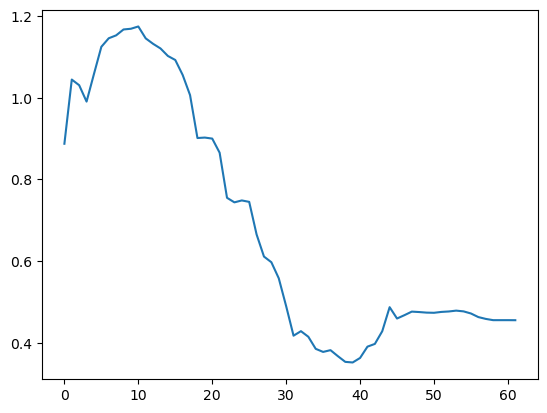

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5ad90465f8>

In [21]:
plot(results[6,:])

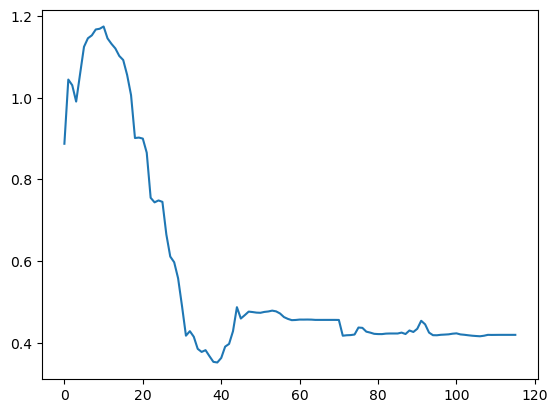

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5ad90bc4e0>

In [17]:
plot(results[6,:])

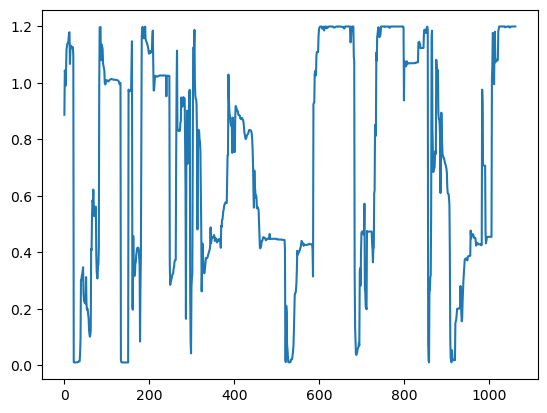

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f89d10d71d0>

In [24]:
plot(results[6,:])

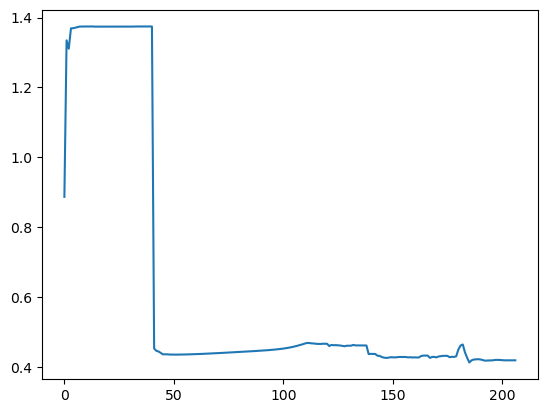

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f61e50bb400>

In [17]:
plot(results[6,:])

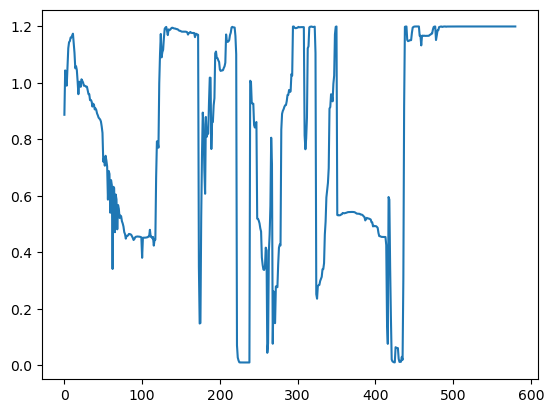

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f89d113f5f8>

In [16]:
plot(results[6,:])

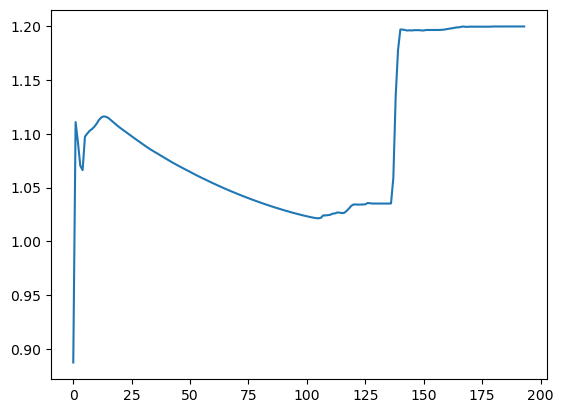

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ffafcc48160>

In [36]:
plot(results[6,:])

In [44]:
collect(Flatten.flatten(model.θ))

11-element Array{Float64,1}:
 49.99967313438298     
 21.36111840622258     
 -0.7190659578232897   
  2.1386194647288506e-5
  1.7992023069744272   
  1.7999999941870481   
  0.006656144275982201 
  0.0                  
  0.0                  
  0.2855907772270928   
  0.09199784796453968  

In [30]:
collect(Flatten.flatten(model.θ))

11-element Array{Float64,1}:
  1.9983179881335271 
 14.325513067509391  
 -0.8180672563105222 
  4.89213930898213   
  2.4999873800836583 
  1.199999049475309  
  0.00969638145449006
  0.0                
  0.0                
  0.34246344078859825
  0.11515042143806208

In [61]:
## crappy solution
#loglikelihood(model.θ, data, n)
#-7686.387794351638

-7686.387794351638

In [47]:
#best solution!
#loglikelihood(model.θ, data, n)
#-7582.694132524038

-7582.694132524038

### Compute Hessian
Blah blah blah

In [42]:
H = Hessian(model, n)
CI, HPSD = CIs(H);

┌ Warning: Hessian is not positive definite. Approximated by closest PSD matrix.
│             ||ϵ||/||H|| is 0.223694523778866
└ @ pulse_input_DDM /usr/people/briandd/Projects/pulse_input_DDM/src/base_model.jl:19


In [43]:
CI

11-element Array{Float64,1}:
 11.650158965965602   
 50.08465038997119    
  0.9794250017826648  
 20.071962630628775   
  0.8280034436388295  
  0.15319607993220483 
  0.009740611905573246
  2.0                 
  2.0                 
  0.17024446361358803 
  0.01086344275122942 

In [44]:
hcat(collect(Flatten.flatten(model.θ)) - CI, collect(Flatten.flatten(θ_syn)), collect(Flatten.flatten(model.θ)) + CI)

11×3 Array{Float64,2}:
 -10.7113       1.0   12.5891   
 -38.3492      13.0   61.8201   
  -1.35075     -0.5    0.608102 
  -8.53344     10.0   31.6105   
   0.0395871    1.0    1.69559  
   0.281214     0.4    0.587606 
   0.0129646    0.02   0.0324458
  -2.0          0.0    2.0      
  -2.0          0.0    2.0      
  -0.00742028   0.1    0.333069 
   0.0865729    0.1    0.1083   

In [45]:
hcat(collect(Flatten.flatten(model.θ)), collect(Flatten.flatten(θ_syn)))

11×2 Array{Float64,2}:
  0.938897    1.0 
 11.7354     13.0 
 -0.371323   -0.5 
 11.5385     10.0 
  0.867591    1.0 
  0.43441     0.4 
  0.0227052   0.02
  0.0         0.0 
  0.0         0.0 
  0.162824    0.1 
  0.0974364   0.1 

In [46]:
hcat(collect(Flatten.flatten(model.θ)) - CI .< collect(Flatten.flatten(θ_syn)) .< collect(Flatten.flatten(model.θ)) + CI)

11×1 BitArray{2}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1